---
#After cleaning data lets move towards Data modelling
---

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data = pd.read_csv('fifa23_cleaned.csv')

In [ ]:
data.head()

,ID,Name,FullName,Age,Height,Weight,Nationality,Overall,Potential,Growth,...,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes
0,158023,L. Messi,Lionel Messi,35,169,67,Argentina,91,91,0,...,75,96,20,35,24,6,11,15,14,8
1,165153,K. Benzema,Karim Benzema,34,185,81,France,91,91,0,...,84,90,43,24,18,13,11,5,5,7
2,188545,R. Lewandowski,Robert Lewandowski,33,185,81,Poland,91,91,0,...,90,88,35,42,19,15,6,12,8,10
3,192985,K. De Bruyne,Kevin De Bruyne,31,181,70,Belgium,91,91,0,...,83,89,68,65,53,15,13,5,10,13
4,231747,K. Mbappé,Kylian Mbappé,23,182,73,France,91,95,4,...,80,88,26,34,32,13,5,7,11,6


In [ ]:
data.columns

Index(['ID', 'Name', 'FullName', 'Age', 'Height', 'Weight', 'Nationality',
       'Overall', 'Potential', 'Growth', 'TotalStats', 'BaseStats',
       'BestPosition', 'Club', 'ValueEUR', 'WageEUR', 'ReleaseClause',
       'ContractUntil', 'ClubJoined', 'OnLoad', 'PreferredFoot',
       'IntReputation', 'WeakFoot', 'SkillMoves', 'AttackingWorkRate',
       'DefensiveWorkRate', 'PaceTotal', 'ShootingTotal', 'PassingTotal',
       'DribblingTotal', 'DefendingTotal', 'PhysicalityTotal', 'Crossing',
       'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling',
       'Curve', 'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
       'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
       'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
       'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
       'Marking', 'StandingTackle', 'SlidingTackle', 'GKDiving', 'GKHandling',
       'GKKicking', 'GKPositioning', 'GKReflexes'],
  

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18447 entries, 0 to 18446
Data columns (total 66 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ID                 18447 non-null  int64  
 1   Name               18447 non-null  object 
 2   FullName           18447 non-null  object 
 3   Age                18447 non-null  int64  
 4   Height             18447 non-null  int64  
 5   Weight             18447 non-null  int64  
 6   Nationality        18447 non-null  object 
 7   Overall            18447 non-null  int64  
 8   Potential          18447 non-null  int64  
 9   Growth             18447 non-null  int64  
 10  TotalStats         18447 non-null  int64  
 11  BaseStats          18447 non-null  int64  
 12  BestPosition       18447 non-null  int64  
 13  Club               18447 non-null  int64  
 14  ValueEUR           18447 non-null  int64  
 15  WageEUR            18447 non-null  int64  
 16  ReleaseClause      184

In [ ]:
needed_columns = ['ID', 'Name', 'Age', 'Height', 'Weight',
       'Overall', 'Potential', 'Growth', 'TotalStats',
       'BaseStats', 'BestPosition', 'Club', 'ValueEUR', 'WageEUR',
       'ReleaseClause', 'ContractUntil', 'ClubJoined', 'OnLoad',
       'PreferredFoot', 'IntReputation', 'WeakFoot','Nationality',
       'SkillMoves', 'AttackingWorkRate', 'DefensiveWorkRate', 'PaceTotal',
       'ShootingTotal', 'PassingTotal', 'DribblingTotal', 'DefendingTotal',
       'PhysicalityTotal', 'Crossing', 'Finishing', 'HeadingAccuracy',
       'ShortPassing', 'Volleys', 'Dribbling', 'Curve', 'FKAccuracy',
       'LongPassing', 'BallControl', 'Acceleration', 'SprintSpeed', 'Agility',
       'Reactions', 'Balance', 'ShotPower', 'Jumping', 'Stamina', 'Strength',
       'LongShots', 'Aggression', 'Interceptions', 'Positioning', 'Vision',
       'Penalties', 'Composure', 'Marking', 'StandingTackle', 'SlidingTackle',
       'GKDiving', 'GKHandling', 'GKKicking', 'GKPositioning', 'GKReflexes']

data = data[needed_columns]

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18447 entries, 0 to 18446
Data columns (total 65 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ID                 18447 non-null  int64  
 1   Name               18447 non-null  object 
 2   Age                18447 non-null  int64  
 3   Height             18447 non-null  int64  
 4   Weight             18447 non-null  int64  
 5   Overall            18447 non-null  int64  
 6   Potential          18447 non-null  int64  
 7   Growth             18447 non-null  int64  
 8   TotalStats         18447 non-null  int64  
 9   BaseStats          18447 non-null  int64  
 10  BestPosition       18447 non-null  int64  
 11  Club               18447 non-null  int64  
 12  ValueEUR           18447 non-null  int64  
 13  WageEUR            18447 non-null  int64  
 14  ReleaseClause      18447 non-null  int64  
 15  ContractUntil      18447 non-null  float64
 16  ClubJoined         184

In [ ]:
# Splitting data into Training and testing
X = data.drop(['BestPosition', 'Nationality', 'ID'], axis = 1)
Y = pd.DataFrame(data['BestPosition'])

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.20, random_state = 42)

In [ ]:
X_train = X_train.drop(['Name'], axis = 1)
test_names = X_test['Name']
X_test = X_test.drop(['Name'], axis = 1)

In [ ]:
top = data.sort_values(by = 'Overall', ascending = False).head(20)

In [ ]:
top_pos = top['BestPosition']
top_names = top['Name']
top = top.drop(['Name', 'BestPosition', 'Nationality', 'ID'], axis = 1)

In [ ]:
top.head()

,Age,Height,Weight,Overall,Potential,Growth,TotalStats,BaseStats,Club,ValueEUR,...,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes
0,35,169,67,91,91,0,2190,452,453,54000000,...,75,96,20,35,24,6,11,15,14,8
2,33,185,81,91,91,0,2205,458,230,84000000,...,90,88,35,42,19,15,6,12,8,10
3,31,181,70,91,91,0,2303,483,399,107500000,...,83,89,68,65,53,15,13,5,10,13
4,23,182,73,91,95,4,2177,470,453,190500000,...,80,88,26,34,32,13,5,7,11,6
1,34,185,81,91,91,0,2147,455,494,64000000,...,84,90,43,24,18,13,11,5,5,7


##Handling imbalance dataset

<Axes: xlabel='BestPosition', ylabel='count'>

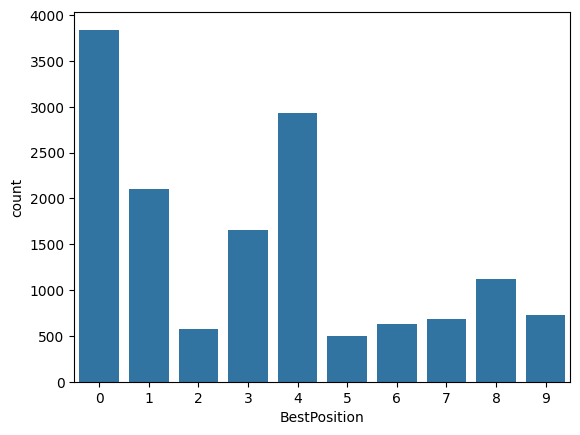

In [ ]:
sns.countplot(data=Y_train, x='BestPosition')

In [ ]:
from imblearn.over_sampling import RandomOverSampler

In [ ]:
# RandomOverSampler is a technique to add duplicated class examples from minority categories to balance the training data
# It is used to reduce biasness from majority categories and balance the training data.

In [ ]:
oversampler = RandomOverSampler(sampling_strategy='minority')

In [ ]:
X_train, Y_train = oversampler.fit_resample(X_train, Y_train)
X_train, Y_train = oversampler.fit_resample(X_train, Y_train)

<Axes: xlabel='BestPosition', ylabel='count'>

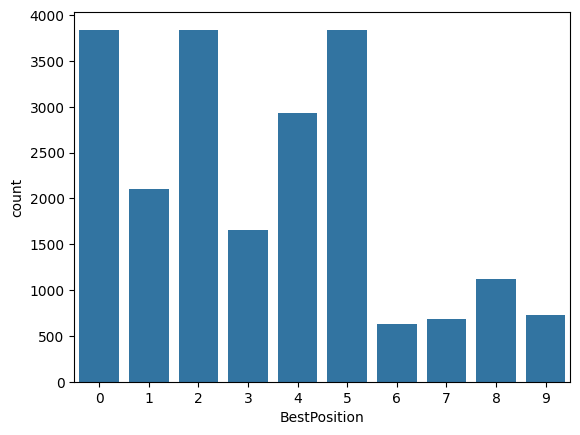

In [ ]:
sns.countplot(data=Y_train, x='BestPosition')

##Feature Scaling

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
mms = MinMaxScaler()
X_train = mms.fit_transform(X_train)
X_test = mms.fit_transform(X_test)
top = mms.fit_transform(top)

In [ ]:
X_train.shape

(21362, 61)

#Modelling
##Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
lr = LogisticRegression()

In [ ]:
lr.fit(X_train, Y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
Y_pred_lr = lr.predict(X_test)

In [ ]:
from sklearn.metrics  import classification_report, confusion_matrix, accuracy_score

In [ ]:
confusion_matrix(Y_test, Y_pred_lr)
#diagonally numbers are all mistakes. We can calculate all digonal to calculate mistakes

array([[752,  18,  38,   0,  62,  47,   5,   0,  35,   5],
       [  6, 474,  16,   0,   0,  12,   4,   0,  10,   0],
       [  4,   3,  99,   0,   4,  10,   1,   0,   4,   7],
       [  0,   0,   0, 391,   0,   0,   0,   0,   0,   0],
       [ 12,   2,   3,   0, 682,   4,   0,   3,   0,   5],
       [  1,   2,  26,   0,   0,  80,   1,   0,   6,   0],
       [ 15,   5,  30,   0,   1, 100,   8,   0,   9,   0],
       [  1,   0,   6,   0,  15, 134,   0,  20,   0,   2],
       [ 38,   7, 112,   0,   0,  13,   0,   0, 143,   0],
       [  2,   0, 118,   0,  13,   1,   0,   1,   2,  60]])

In [ ]:
print(classification_report(Y_test, Y_pred_lr))

              precision    recall  f1-score   support

           0       0.90      0.78      0.84       962
           1       0.93      0.91      0.92       522
           2       0.22      0.75      0.34       132
           3       1.00      1.00      1.00       391
           4       0.88      0.96      0.92       711
           5       0.20      0.69      0.31       116
           6       0.42      0.05      0.09       168
           7       0.83      0.11      0.20       178
           8       0.68      0.46      0.55       313
           9       0.76      0.30      0.43       197

    accuracy                           0.73      3690
   macro avg       0.68      0.60      0.56      3690
weighted avg       0.81      0.73      0.74      3690



In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rf = RandomForestClassifier(criterion = 'entropy', n_estimators = 50)

In [ ]:
rf.fit(X_train, Y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestClassifier(criterion='entropy', n_estimators=50)

In [ ]:
Y_pred_rf = rf.predict(X_test)

In [ ]:
print(classification_report(Y_test, Y_pred_rf))

              precision    recall  f1-score   support

           0       0.81      0.87      0.84       962
           1       0.87      0.94      0.90       522
           2       0.33      0.34      0.33       132
           3       1.00      1.00      1.00       391
           4       0.89      0.96      0.92       711
           5       0.41      0.34      0.37       116
           6       0.69      0.32      0.44       168
           7       0.73      0.67      0.70       178
           8       0.62      0.58      0.60       313
           9       0.72      0.64      0.68       197

    accuracy                           0.80      3690
   macro avg       0.71      0.67      0.68      3690
weighted avg       0.80      0.80      0.80      3690



In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
dt = DecisionTreeClassifier(max_features = 39, max_depth=10)

In [ ]:
dt.fit(X_train, Y_train)

DecisionTreeClassifier(max_depth=10, max_features=39)

In [ ]:
Y_pred_dt = dt.predict(X_test)

In [ ]:
print(classification_report(Y_test, Y_pred_dt))
#RandomForest is always better than decision tree

              precision    recall  f1-score   support

           0       0.77      0.69      0.73       962
           1       0.91      0.77      0.84       522
           2       0.14      0.58      0.23       132
           3       1.00      1.00      1.00       391
           4       0.89      0.83      0.86       711
           5       0.17      0.63      0.27       116
           6       0.48      0.29      0.36       168
           7       0.57      0.26      0.36       178
           8       0.60      0.21      0.32       313
           9       0.48      0.19      0.27       197

    accuracy                           0.65      3690
   macro avg       0.60      0.55      0.52      3690
weighted avg       0.74      0.65      0.67      3690



In [ ]:
from sklearn.svm import SVC

In [ ]:
svc = SVC()

In [ ]:
svc.fit(X_train, Y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC()

In [ ]:
svc_pred = svc.predict(X_test)

In [ ]:
print(confusion_matrix(Y_test, svc_pred))
print(classification_report(Y_test, svc_pred))

[[786  21  36   0  36  36  10   0  36   1]
 [  8 473  17   0   0  12   4   0   8   0]
 [  5   2 104   0   5  10   1   0   4   1]
 [  0   0   0 391   0   0   0   0   0   0]
 [ 15   0   9   0 679   6   0   0   0   2]
 [  3   1  21   0   0  85   1   0   4   1]
 [ 13   8  31   0   0  64  43   0   9   0]
 [  1   0   8   0  13 154   0   2   0   0]
 [ 38  10  97   0   0  16   0   0 152   0]
 [  5   0 158   0  11   2   0   0   1  20]]
              precision    recall  f1-score   support

           0       0.90      0.82      0.86       962
           1       0.92      0.91      0.91       522
           2       0.22      0.79      0.34       132
           3       1.00      1.00      1.00       391
           4       0.91      0.95      0.93       711
           5       0.22      0.73      0.34       116
           6       0.73      0.26      0.38       168
           7       1.00      0.01      0.02       178
           8       0.71      0.49      0.58       313
           9       0.80     

#Ensemble Methods

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

In [ ]:
ada = AdaBoostClassifier()

In [ ]:
ada.fit(X_train, Y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


AdaBoostClassifier()

In [ ]:
Y_adadt_pred = ada.predict(X_test)

In [ ]:
print(classification_report(Y_test, Y_adadt_pred))

              precision    recall  f1-score   support

           0       0.76      0.26      0.39       962
           1       0.43      0.97      0.60       522
           2       0.08      0.24      0.12       132
           3       1.00      1.00      1.00       391
           4       0.84      0.83      0.83       711
           5       0.15      0.28      0.20       116
           6       0.57      0.14      0.22       168
           7       0.54      0.47      0.50       178
           8       0.51      0.15      0.24       313
           9       0.47      0.42      0.44       197

    accuracy                           0.55      3690
   macro avg       0.53      0.48      0.45      3690
weighted avg       0.65      0.55      0.54      3690



In [ ]:
ada_lr = AdaBoostClassifier(LogisticRegression())

In [ ]:
ada_lr.fit(X_train, Y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


AdaBoostClassifier(estimator=LogisticRegression())

In [ ]:
ada_lr_pred = ada_lr.predict(X_test)

In [ ]:
print(classification_report(Y_test, ada_lr_pred))
#Logistic regression used only for binary class(0,1) and not for multiclass(0,1,2,3,4,5,6,7,8,9)

              precision    recall  f1-score   support

           0       0.71      0.56      0.63       962
           1       0.97      0.51      0.67       522
           2       0.11      0.79      0.19       132
           3       1.00      1.00      1.00       391
           4       0.96      0.82      0.88       711
           5       0.12      0.69      0.20       116
           6       0.00      0.00      0.00       168
           7       0.00      0.00      0.00       178
           8       0.00      0.00      0.00       313
           9       0.00      0.00      0.00       197

    accuracy                           0.53      3690
   macro avg       0.39      0.44      0.36      3690
weighted avg       0.62      0.53      0.55      3690



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
knn = KNeighborsClassifier(n_neighbors=10)

In [ ]:
knn.fit(X_train, Y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:233: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(n_neighbors=10)

In [ ]:
knn_pred = knn.predict(X_test)

In [ ]:
print(classification_report(Y_test, knn_pred))

              precision    recall  f1-score   support

           0       0.76      0.65      0.70       962
           1       0.87      0.80      0.83       522
           2       0.14      0.64      0.23       132
           3       1.00      1.00      1.00       391
           4       0.90      0.84      0.87       711
           5       0.16      0.67      0.26       116
           6       0.53      0.19      0.28       168
           7       0.59      0.11      0.19       178
           8       0.62      0.21      0.32       313
           9       0.66      0.18      0.28       197

    accuracy                           0.64      3690
   macro avg       0.62      0.53      0.50      3690
weighted avg       0.75      0.64      0.66      3690



In [ ]:
ada_svm = AdaBoostClassifier(SVC(), algorithm = 'SAMME')

In [ ]:
ada_svm.fit(X_train, Y_train)

In [ ]:
mapping = {'CF':0, 'CM':1, 'RW':2, 'GK':3, 'CB':4, 'LW':5, 'LM': 6, 'LB':7, 'RM':8, 'RB': 9}

In [ ]:
top = pd.DataFrame(top)
for i in range(top.shape[0]):

  pred_position = rf.predict(top.iloc[[i]])[0]

  pred = list(mapping.keys())[list(mapping.values()).index(pred_position)]
  true_pos = list(mapping.keys())[list(mapping.values()).top_pos.iloc[i]]

  print('Name: {} \nPredictions: {} \nTrue Position: {} \n'.format(top_names.iloc[i], pred, true_pos))

In [ ]:
list(mapping.keys())[list(mapping.values()).index(pred_pos)]